In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
train_directory ='/content/drive/My Drive/TFG/DATA/tumor 2/Training'
test_directory ='/content/drive/My Drive/TFG/DATA/tumor 2/Testing'

In [ ]:
#Taking the dataset
image_size =(150, 150)
batch_size =16

train_ds =tf.keras.preprocessing.image_dataset_from_directory(train_directory, image_size=image_size, batch_size=batch_size, validation_split=0.2, subset='training', seed=123)

val_ds =tf.keras.preprocessing.image_dataset_from_directory(train_directory, image_size=image_size, batch_size=batch_size, validation_split=0.2, subset='validation', seed=123)

test_ds =tf.keras.preprocessing.image_dataset_from_directory(test_directory,image_size=image_size, batch_size=batch_size,)

Found 5742 files belonging to 2 classes.
Using 4594 files for training.
Found 5742 files belonging to 2 classes.
Using 1148 files for validation.
Found 1321 files belonging to 2 classes.


IndexError: ignored

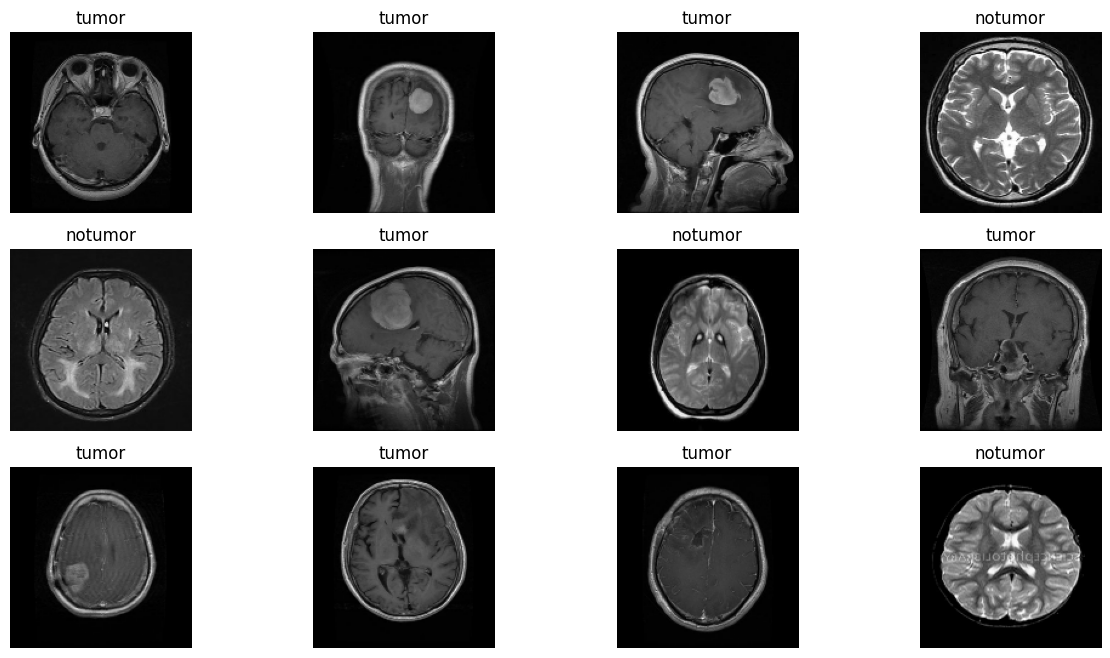

In [ ]:
#Plot of the dataset
import matplotlib.pyplot as plt

train_img,train_lb =next(iter(train_ds.take(6)))
val_img,val_lb=next(iter(val_ds.take(6)))
test_img,test_lb =next(iter(test_ds.take(6)))

class_names =train_ds.class_names

fig, axs =plt.subplots(3,4,figsize=(15,8))
for i in range(6):
    axs[0,i].imshow(train_img[i].numpy().astype("uint8"))
    axs[0,i].set_title(class_names[train_lb[i]])
    axs[0,i].axis("off")
    axs[1,i].imshow(val_img[i].numpy().astype("uint8"))
    axs[1,i].set_title(class_names[val_lb[i]])
    axs[1,i].axis("off")
    axs[2,i].imshow(test_img[i].numpy().astype("uint8"))
    axs[2,i].set_title(class_names[test_lb[i]])
    axs[2,i].axis("off")
plt.show()

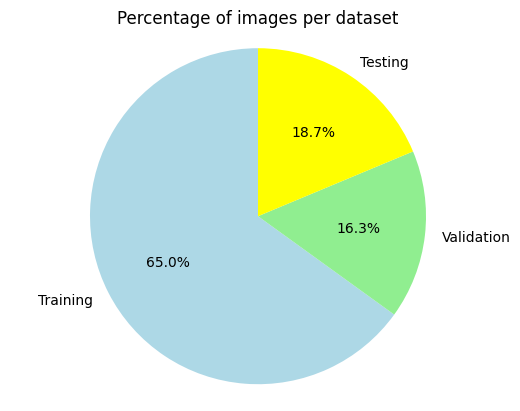

In [ ]:
# pie chart

train_size =len(train_ds.file_paths)
val_size =len(val_ds.file_paths)
test_size =len(test_ds.file_paths)
total_size =train_size +val_size+ test_size

train_percent =train_size /total_size *100
val_percent =val_size/total_size*100
test_percent =test_size /total_size *100

labels =["Training","Validation","Testing"]
sizes =[train_percent,val_percent,test_percent]
colors=["lightblue","lightgreen","yellow"]
fig,ax= plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)
ax.axis("equal")
plt.title("Dataset")
plt.show()

In [ ]:
#Model 2
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics= ['accuracy'])


In [ ]:
history =model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
144/144 [==============================] - 747s 5s/step - loss: 0.3100 - accuracy: 0.8714 - val_loss: 0.1638 - val_accuracy: 0.9486
Epoch 2/10
144/144 [==============================] - 317s 2s/step - loss: 0.1180 - accuracy: 0.9602 - val_loss: 0.0964 - val_accuracy: 0.9669
Epoch 3/10
144/144 [==============================] - 296s 2s/step - loss: 0.0942 - accuracy: 0.9650 - val_loss: 0.1194 - val_accuracy: 0.9625
Epoch 4/10
144/144 [==============================] - 285s 2s/step - loss: 0.0648 - accuracy: 0.9758 - val_loss: 0.0745 - val_accuracy: 0.9808
Epoch 5/10
144/144 [==============================] - 281s 2s/step - loss: 0.0536 - accuracy: 0.9824 - val_loss: 0.0765 - val_accuracy: 0.9774
Epoch 6/10
144/144 [==============================] - 274s 2s/step - loss: 0.0334 - accuracy: 0.9872 - val_loss: 0.0647 - val_accuracy: 0.9826
Epoch 7/10
144/144 [==============================] - 293s 2s/step - loss: 0.0349 - accuracy: 0.9876 - val_loss: 0.0776 - val_accuracy: 0.9782

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

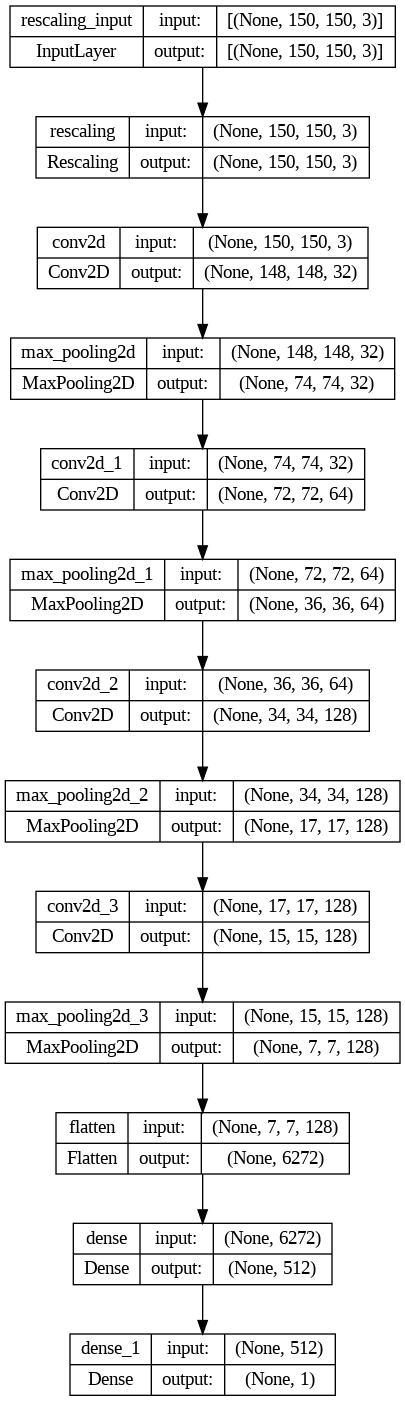

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize

tf.keras.utils.plot_model(model,
                          to_file= "model.png",
                          show_shapes =True,
                          expand_nested =True)

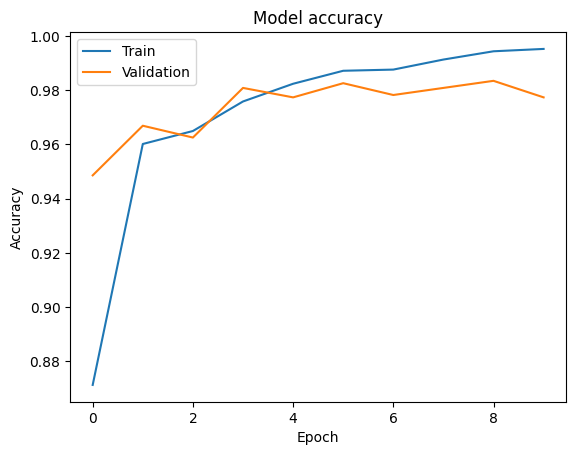

In [ ]:
# plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc ='upper left')
plt.show()

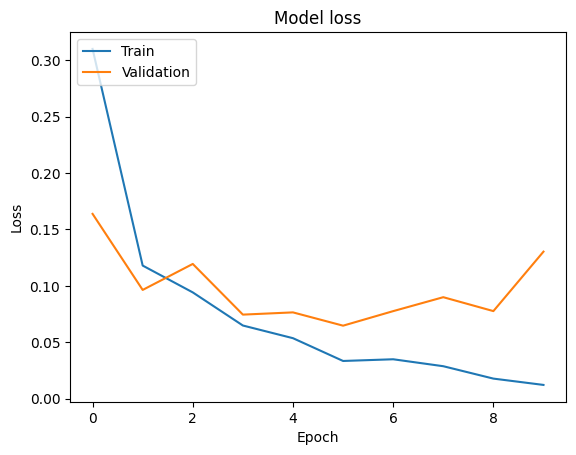

In [ ]:
# plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'],loc= 'upper left')
plt.show()

In [ ]:
test_loss, test_acc =model.evaluate(test_ds)
print('Test accuracy:',test_acc)

42/42 [==============================] - 173s 3s/step - loss: 0.0614 - accuracy: 0.9871
Test accuracy: 0.9871309399604797


In [ ]:
#second dataset
train_directory2= '/content/drive/My Drive/TFG/DATA/tumor'
batch_size =32
target_size =(150, 150)

train_data2 =tf.keras.preprocessing.image_dataset_from_directory(train_directory2,validation_split=0.2,subset="training",seed=164,image_size=target_size,batch_size=batch_size,)

val_data2= tf.keras.preprocessing.image_dataset_from_directory(train_directory2,validation_split=0.2,subset="validation",seed=164,image_size=target_size,batch_size=batch_size,)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


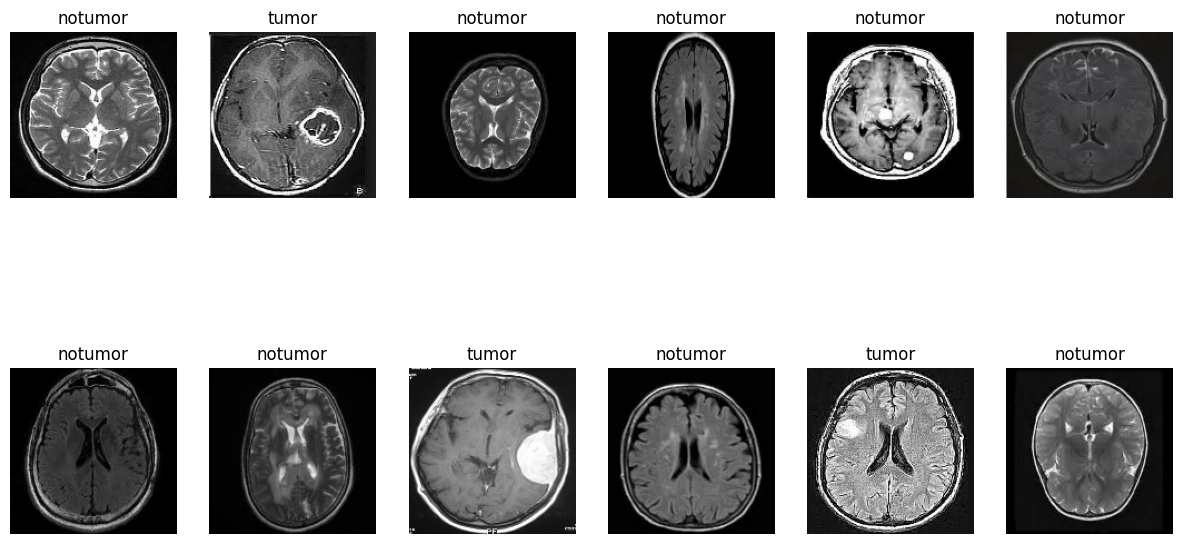

In [ ]:
import matplotlib.pyplot as plt

train_images2, train_labels2 =next(iter(train_data2.take(6)))
val_images2, val_labels2=next(iter(val_data2.take(6)))

class_names =train_data2.class_names

fig, axs= plt.subplots(2,6,figsize=(15, 8))
for i in range(6):
    axs[0,i].imshow(train_images2[i].numpy().astype("uint8"))
    axs[0,i].set_title(class_names[train_labels2[i]])
    axs[0,i].axis("off")
    axs[1,i].imshow(val_images2[i].numpy().astype("uint8"))
    axs[1,i].set_title(class_names[val_labels2[i]])
    axs[1,i].axis("off")
plt.show()

In [ ]:
history2 = model.fit(train_data2, epochs=10, validation_data=val_data2)

Epoch 1/10
75/75 [==============================] - 232s 3s/step - loss: 0.3835 - accuracy: 0.8537 - val_loss: 0.2138 - val_accuracy: 0.9083
Epoch 2/10
75/75 [==============================] - 156s 2s/step - loss: 0.1513 - accuracy: 0.9446 - val_loss: 0.1149 - val_accuracy: 0.9617
Epoch 3/10
75/75 [==============================] - 153s 2s/step - loss: 0.0694 - accuracy: 0.9762 - val_loss: 0.0720 - val_accuracy: 0.9767
Epoch 4/10
75/75 [==============================] - 163s 2s/step - loss: 0.0243 - accuracy: 0.9929 - val_loss: 0.0769 - val_accuracy: 0.9750
Epoch 5/10
75/75 [==============================] - 163s 2s/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0758 - val_accuracy: 0.9817
Epoch 6/10
75/75 [==============================] - 154s 2s/step - loss: 0.0091 - accuracy: 0.9983 - val_loss: 0.1047 - val_accuracy: 0.9783
Epoch 7/10
75/75 [==============================] - 150s 2s/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.0931 - val_accuracy: 0.9833
Epoch 8/10
75

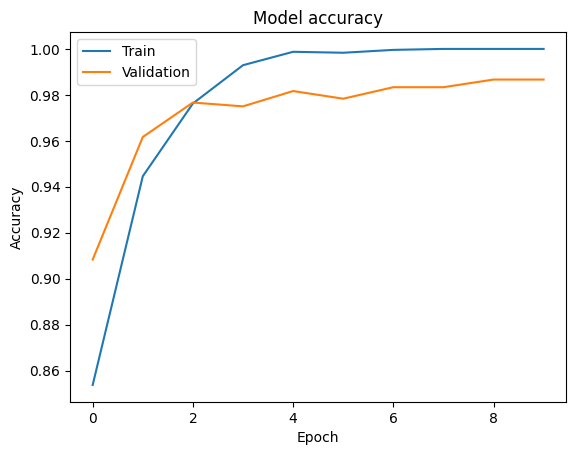

In [ ]:
#accuracy curves
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc ='upper left')
plt.show()

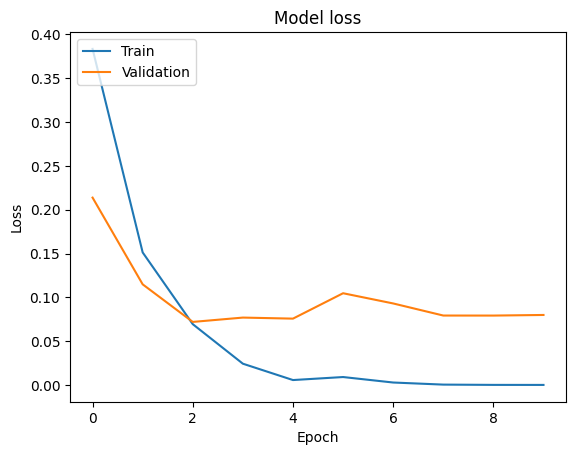

In [ ]:
# loss curves
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc= 'upper left')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/TFG/DATA/tumor_pred3.h5')

In [ ]:
model.save('tumor_pred3.h5')

In [ ]:
model.save_weights('/content/drive/My Drive/TFG/DATA/tumor_pred3_weights.h5')

In [ ]:
!jupyter nbconvert --to html TUMOR_PREDICTOR_FINAL.ipynb

[NbConvertApp] Converting notebook TUMOR_PREDICTOR_FINAL.ipynb to html
[NbConvertApp] Writing 2071149 bytes to TUMOR_PREDICTOR_FINAL.html
